In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('modeldata.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
# Feature selection with hyper parameter tuning

In [6]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [8]:
x=df.drop(columns=['loan_status'])
y = df['loan_status']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [10]:
rfe = RFE(lr,51).fit(x,y)

In [11]:
lr_rank=rfe.ranking_

In [12]:
log_rfe = pd.DataFrame([x_train.columns,lr_rank]).T

In [13]:
rfe = RFE(rf,51).fit(x,y)

KeyboardInterrupt: 

In [14]:
log_rfe

,0,1
0,member_id,1
1,loan_amnt,1
2,funded_amnt_inv,1
3,term,1
4,int_rate,1
5,emp_length,1
6,annual_inc,1
7,dti,1
8,delinq_2yrs,1
9,inq_last_6mths,1


In [15]:
collr=['home_ownership_NONE','application_type_JOINT','Nurse']

In [16]:
len(collr)

3

In [17]:
x_lr_df = df.drop(columns=collr)

In [18]:
x_lr_df

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,Driver,Engineer,Manager,Not Available,Others,Owner,Public Coordinator,Technician
0,58189336,120.928846,137.716408,36,19.19,9.0,6.387448,16.252193,0,1,50.0,14,1,44.252683,48.784135,28,21.728120,0.000000,0.00,0.0000,26.0,0,-63.654529,43.816669,30800.000000,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,70011223,76.310834,85.350806,36,10.99,1.0,6.665420,2.135813,0,1,30.0,6,0,32.895933,17.010018,13,8.652081,0.000000,0.00,0.0000,9.0,0,-63.654529,33.175683,32900.000000,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,70255675,103.952911,117.676325,36,7.26,2.0,6.543221,9.972001,0,0,30.0,5,0,36.292623,22.427029,19,7.383631,0.000000,0.00,0.0000,9.0,0,2.236324,47.214511,34900.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,1893936,123.189497,140.394466,36,19.72,10.0,6.818113,8.392020,0,2,46.0,10,0,38.673046,38.019557,21,33.834155,0.000000,0.00,0.0000,135.0,0,-63.654529,51.956538,24700.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,7652106,126.557253,144.387886,36,10.64,10.0,6.591809,10.737137,0,0,30.0,11,0,50.141514,50.646263,27,26.862666,0.000000,0.00,0.0000,96.0,0,-63.654529,49.815426,47033.000000,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,10247268,123.189497,140.190849,36,8.90,2.0,6.859327,7.098630,0,0,56.0,18,0,42.289384,43.567768,30,25.552708,0.000000,0.00,0.0000,113.0,0,-63.654529,82.698006,29500.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,8089625,77.639635,86.703718,36,7.90,5.0,6.711760,3.482624,0,0,30.0,13,2,38.329542,17.491918,23,17.245830,0.000000,0.00,0.0000,117.0,0,2.673280,35.794466,55500.000000,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,23043116,83.853493,94.129089,36,9.17,8.0,6.604376,6.762258,0,1,46.0,13,0,26.386206,21.291251,49,17.811973,0.000000,0.00,0.0000,78.0,0,-63.654529,77.664752,11800.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,45900933,83.853493,94.129089,36,13.99,7.0,6.776766,15.098109,0,0,77.0,16,0,54.076940,50.885878,27,17.664703,0.000000,0.00,0.0000,44.0,0,-63.654529,78.293389,62100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,41272507,174.416072,201.578334,60,17.14,2.0,6.698609,16.267232,0,0,30.0,12,0,47.826254,59.126194,30,35.200888,0.000000,0.00,0.0000,52.0,0,-63.654529,56.290179,33200.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [19]:
x_lr_df_train,x_lr_df_test = train_test_split(x_lr_df,test_size=0.25,random_state=1)

In [20]:
x_lr_df_test

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,Driver,Engineer,Manager,Not Available,Others,Owner,Public Coordinator,Technician
2785,70091401,123.446593,140.699164,60,18.20,3.0,6.740318,6.348314,1,1,12.0,8,1,28.017058,31.281207,26,15.730739,0.0,0.00,0.0000,9.0,0,-63.654529,60.366496,4100.000000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
58277,42575170,123.189497,140.394466,36,6.99,7.0,6.851556,13.740907,0,1,51.0,23,0,43.849320,42.036353,56,19.401312,0.0,0.00,0.0000,48.0,0,-63.654529,66.572569,67300.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
51509,49900236,121.892501,138.857735,36,7.89,6.0,6.457054,8.626815,0,0,30.0,11,0,32.221358,19.877452,23,18.330705,0.0,0.00,0.0000,35.0,0,-63.654529,39.750939,23900.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4034,8656994,103.952911,117.676325,60,15.22,5.0,6.610469,3.023892,0,0,42.0,9,0,28.275834,33.820345,21,28.364801,0.0,0.00,0.0000,109.0,0,-63.654529,26.657010,23800.000000,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56874,72197277,175.356654,202.584403,60,11.99,8.0,6.802914,15.505282,0,0,30.0,19,0,55.755071,55.766584,33,13.849099,0.0,0.00,0.0000,4.0,0,-63.654529,83.636526,25000.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
16576,15379785,147.246685,169.015732,36,12.49,1.0,6.724344,13.064896,0,1,30.0,5,0,42.335099,59.419682,19,31.359864,0.0,0.00,0.0000,91.0,0,-63.654529,75.355692,39300.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
39788,37887841,175.356654,202.709697,36,14.31,3.0,6.906219,3.895426,0,0,30.0,12,2,31.033246,5.568935,13,33.968990,0.0,0.00,0.0000,61.0,0,2.591034,34.609844,20800.000000,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3511,63416848,103.952911,117.676325,36,7.26,6.0,6.503110,9.131508,0,2,63.0,21,0,32.169234,11.217497,32,12.432206,0.0,0.00,0.0000,17.0,0,-63.654529,72.119792,10450.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
39387,69303227,103.952911,117.676325,36,9.17,3.0,6.732441,7.449579,1,1,10.0,4,0,28.749463,27.745261,10,10.527873,0.0,0.00,0.0000,9.0,0,-63.654529,75.826323,16000.000000,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
859,65671869,89.481939,100.701333,36,11.53,10.0,6.446974,14.007271,1,1,20.0,5,0,49.181657,64.380737,16,10.620225,0.0,0.00,0.0000,13.0,0,-63.654529,56.975610,21800.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [26]:
parmns1={
'penalty':['l1', 'l2', 'elasticnet', 'none'],
'tol':[0.0001,0.00001,0.000001,0.0000001],
'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [27]:
logrsv = RandomizedSearchCV(lr,parmns1,n_iter=50,n_jobs=-1,cv=5).fit(x_lr_df,y)

In [65]:
logrsv.best_params_

{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1'}

In [192]:
lr5 = LogisticRegression(**logrsv.best_params_).fit(x_lr_df_train,y_train)

In [193]:
y_train_lrpred = lr5.predict(x_lr_df_train)

In [194]:
accuracy_score(y_train,y_train_lrpred)

1.0

In [195]:
print(classification_report(y_train,y_train_lrpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36479
           1       1.00      1.00      1.00     11318

    accuracy                           1.00     47797
   macro avg       1.00      1.00      1.00     47797
weighted avg       1.00      1.00      1.00     47797



In [196]:
print(confusion_matrix(y_train,y_train_lrpred))

[[36479     0]
 [    0 11318]]


In [197]:
y_test_lrpred = lr5.predict(x_lr_df_test)

In [198]:
accuracy_score(y_test,y_test_lrpred)

1.0

In [199]:
print(classification_report(y_test,y_test_lrpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12098
           1       1.00      1.00      1.00      3835

    accuracy                           1.00     15933
   macro avg       1.00      1.00      1.00     15933
weighted avg       1.00      1.00      1.00     15933



In [200]:
rfe_rank = rfe.ranking_

In [201]:
rf_rfe = pd.DataFrame([x_train.columns,rfe_rank]).T

In [202]:
rf_rfe

,0,1
0,member_id,1
1,loan_amnt,1
2,funded_amnt_inv,1
3,term,1
4,int_rate,1
5,emp_length,1
6,annual_inc,1
7,dti,1
8,delinq_2yrs,1
9,inq_last_6mths,1


In [43]:
colrf=['application_type_JOINT','purpose_educational','home_ownership_NONE']
x_rf_df = df.drop(columns=colrf)

In [44]:
scdf = ss.fit_transform(x_rf_df)

In [45]:
from sklearn.decomposition import PCA
pcadf = PCA(46).fit(scdf)

In [46]:
pcasdf = pcadf.fit_transform(scdf)

In [47]:
pcamaindf= pd.DataFrame(pcasdf)

In [48]:
pcamaindf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-0.080367,-0.273096,3.081106,0.699898,-0.580081,-0.472982,0.665985,-1.590677,2.038363,-2.165335,-0.014183,-2.325024,-1.306764,0.283892,-0.309335,-0.272648,0.205379,2.009283,-2.744126,0.819992,0.193624,-0.615159,0.921013,0.067798,0.621084,-0.160536,0.234601,-0.819390,0.733287,1.274275,0.239986,-0.626279,0.832724,-0.071832,0.103166,0.078405,-1.355522,0.057412,0.885367,1.082606,-0.231495,0.395753,0.329950,-0.112833,-0.122276,-0.369913
1,-2.705988,-2.623898,-1.290260,1.354873,0.765534,0.956876,-1.927122,-1.009020,-0.709353,-0.484754,-0.166702,0.009031,0.496607,-0.150800,-1.490856,1.730076,-3.692000,0.496140,1.423857,1.815877,-0.771661,1.063392,-1.581185,0.998774,0.587435,1.516493,0.240795,0.745045,-1.689610,0.786158,0.234654,0.866301,1.215422,-0.265521,0.369502,0.784584,0.697651,0.286104,-0.852702,0.158929,-1.109001,0.091830,1.164511,0.378037,-1.142564,0.695955
2,-2.344342,-2.271451,0.457269,0.783736,-0.039866,0.577698,1.178755,-1.161701,0.024319,-1.200062,1.549239,-1.146508,-1.620632,-0.569544,0.049148,0.564103,-0.223299,0.669237,-0.054352,-1.294084,0.375769,-1.501968,-0.764722,-3.982769,-2.768029,2.372403,-0.861874,-2.351089,0.009924,-0.186656,0.108044,-0.289470,0.666168,1.734135,-0.212751,0.004616,0.891106,-0.760781,1.279996,-0.338637,-0.234029,0.920254,0.063764,0.033444,0.253501,0.129462
3,0.617083,3.041591,0.695801,-1.048223,-0.641137,0.681291,-0.147048,-0.213654,-0.592673,0.204097,-1.693605,0.955664,0.120670,0.532060,1.759654,2.123769,0.584629,1.563821,0.551382,-2.370241,0.012069,-0.855738,0.517735,2.468324,-0.515384,0.490845,-0.086714,-0.399337,0.339309,0.578559,0.176486,-0.127197,-0.932283,-1.113367,-0.689231,1.468972,0.109992,-0.876856,0.548619,0.220336,0.581976,0.517902,-1.005713,0.694200,-0.611027,-0.007985
4,0.134450,0.768346,-0.831462,-2.975575,1.063196,-2.026015,0.619606,0.854840,-0.696137,-0.769177,0.273040,0.033679,-0.284627,-0.030661,-1.504135,-0.516586,0.618242,-0.451280,0.616204,0.329866,0.591222,0.349422,0.307353,0.737516,-0.141664,-0.254568,-0.122244,-0.629659,0.637375,0.493632,-0.589196,0.600057,-0.702920,-0.344212,-0.097061,0.213302,1.237952,-0.151315,0.259506,0.121301,-0.462564,-0.517946,0.249328,-0.941219,-0.426126,-0.209241
5,1.257042,0.170863,-1.778372,-0.608117,-0.276057,0.509747,1.214212,-0.885885,1.270919,-0.119406,0.088676,-1.215688,1.404351,1.493917,0.695499,0.407792,-0.230572,-0.819517,-0.988868,-0.603015,-0.901493,0.215921,-0.367925,-0.334702,0.420515,0.060442,0.587694,-0.249485,0.068185,-0.110467,0.612839,-0.197081,0.945022,0.213758,0.797293,0.452419,-0.378821,-1.683579,0.957284,0.331338,1.098294,0.676318,-0.137718,0.375606,0.411307,0.070537
6,-3.049887,1.838848,-1.514656,-0.653241,-0.506833,2.626508,-0.618543,-1.016443,-0.064673,0.347898,0.408442,0.066775,-0.329326,0.204066,-0.536996,0.145626,1.076436,-0.245420,0.746823,0.647198,1.117977,-0.307593,0.781116,0.780839,-0.106887,-1.173711,-0.335075,0.019476,1.098154,0.457095,-0.324621,-0.391683,1.337287,1.433329,0.298556,-1.252227,-0.010296,0.236028,1.724798,-1.325156,0.583901,0.279587,1.598461,-0.832016,-0.203739,0.496226
7,-1.022073,-0.667441,-3.194291,0.714569,0.826664,-1.076822,0.038065,-0.771957,0.750106,-1.641045,0.954264,-0.203705,0.446960,1.324435,0.784509,-0.280905,-0.566506,2.096229,2.124818,1.919647,-1.155144,1.614804,-0.457239,0.311654,-0.066592,0.022145,-0.243410,-0.867183,-0.478933,-0.307693,0.206943,-0.214203,-0.497014,-0.944194,0.370321,0.267815,-0.711874,-2.193887,-0.743721,-0.200829,-0.277740,-0.146706,-0.798704,0.257502,-0.197172,-0.568927
8,0.363865,-1.129812,-1.120038,1.015595,0.236063,-2.126916,0.557527,-1.648811,1.923771,2.245856,-0.525212,0.408204,-0.423722,-0.426842,-2.196546,0.406354,-0.559627,-0.700993,-0.301581,-0.092057,0.533600,0.169662,-0.901089,1.274805,0.558588,0.881833,0.487722,-0.254624,-0.659004,1.959674,0.195192,2.752296,0.118977,0.673941,0.204630,0.151942,0.958420,-0.522677,0.290952,

In [49]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(pcamaindf,df['loan_status'],test_size=0.25,random_state=1)

In [50]:
x_pca_train,x_pca_test = train_test_split(pcamaindf,test_size=0.25,random_state=1)

In [41]:
from scipy.stats import randint as randint

In [42]:
params1={
'criterion':['gini','entropy'],
    
    'max_depth':randint(1,200),
    'min_samples_split':randint(1,150),
    'min_samples_leaf':randint(1,200)}

In [43]:
rfrsv = RandomizedSearchCV(rf,params1,n_iter=50,n_jobs=-1,cv=5).fit(x_rf_df,y)

In [204]:
x_rf_df_train,x_rf_df_test = train_test_split(x_rf_df,test_size=0.25,random_state=1)

In [205]:
rf5 = RandomForestClassifier(**rfrsv.best_params_).fit(x_rf_df_train,y_train)

In [207]:
y_train_rfpred = rf5.predict(x_rf_df_train)

In [208]:
accuracy_score(y_train,y_train_rfpred)

1.0

In [209]:
print(classification_report(y_train,y_train_rfpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36479
           1       1.00      1.00      1.00     11318

    accuracy                           1.00     47797
   macro avg       1.00      1.00      1.00     47797
weighted avg       1.00      1.00      1.00     47797



In [210]:
y_test_rfpred = rf5.predict(x_rf_df_test)

In [211]:
accuracy_score(y_test,y_test_rfpred)

0.9999372371806942

In [212]:
print(classification_report(y_test,y_test_rfpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12098
           1       1.00      1.00      1.00      3835

    accuracy                           1.00     15933
   macro avg       1.00      1.00      1.00     15933
weighted avg       1.00      1.00      1.00     15933



In [22]:
y = df['loan_status']
x = df.drop(columns=['loan_status'])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
# Feature extraction with hyper parameter tuning

In [21]:
df['inactive_accounts'] = df['total_acc'] - df['open_acc']

In [22]:
df['total_fee'] = df['total_rec_late_fee'] + df['collection_recovery_fee']

In [23]:
df.drop(columns=['total_rec_late_fee','collection_recovery_fee','total_acc','open_acc'],inplace=True)

In [24]:
df

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee
0,58189336,120.928846,137.716408,36,19.19,9.0,6.387448,16.252193,0,1,50.0,1,44.252683,48.784135,21.728120,0.00,26.0,0,-63.654529,43.816669,30800.000000,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0.000000
1,70011223,76.310834,85.350806,36,10.99,1.0,6.665420,2.135813,0,1,30.0,0,32.895933,17.010018,8.652081,0.00,9.0,0,-63.654529,33.175683,32900.000000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,7,0.000000
2,70255675,103.952911,117.676325,36,7.26,2.0,6.543221,9.972001,0,0,30.0,0,36.292623,22.427029,7.383631,0.00,9.0,0,2.236324,47.214511,34900.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,14,0.000000
3,1893936,123.189497,140.394466,36,19.72,10.0,6.818113,8.392020,0,2,46.0,0,38.673046,38.019557,33.834155,0.00,135.0,0,-63.654529,51.956538,24700.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,11,0.000000
4,7652106,126.557253,144.387886,36,10.64,10.0,6.591809,10.737137,0,0,30.0,0,50.141514,50.646263,26.862666,0.00,96.0,0,-63.654529,49.815426,47033.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,16,0.000000
5,10247268,123.189497,140.190849,36,8.90,2.0,6.859327,7.098630,0,0,56.0,0,42.289384,43.567768,25.552708,0.00,113.0,0,-63.654529,82.698006,29500.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12,0.000000
6,8089625,77.639635,86.703718,36,7.90,5.0,6.711760,3.482624,0,0,30.0,2,38.329542,17.491918,17.245830,0.00,117.0,0,2.673280,35.794466,55500.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0.000000
7,23043116,83.853493,94.129089,36,9.17,8.0,6.604376,6.762258,0,1,46.0,0,26.386206,21.291251,17.811973,0.00,78.0,0,-63.654529,77.664752,11800.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,36,0.000000
8,45900933,83.853493,94.129089,36,13.99,7.0,6.776766,15.098109,0,0,77.0,0,54.076940,50.885878,17.664703,0.00,44.0,0,-63.654529,78.293389,62100.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,11,0.000000
9,41272507,174.416072,201.578334,60,17.14,2.0,6.698609,16.267232,0,0,30.0,0,47.826254,59.126194,35.200888,0.00,52.0,0,-63.654529,56.290179,33200.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,18,0.000000


In [25]:
y = df['loan_status']
x = df.drop(columns=['loan_status'])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [59]:
# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
from scipy.stats import randint as randint

In [25]:
params2={
'n_estimators': randint(1,200),
'criterion':['gini','entropy'],
    
    'max_depth':randint(1,200),
    'min_samples_split':randint(1,150),
    'min_samples_leaf':randint(1,200)}

In [28]:
rf = RandomForestClassifier().fit(x_train,y_train)

In [154]:
rf4 = RandomForestClassifier(**rfrsv.best_params_).fit(x_pca_train,y_train)

In [65]:
y_train_rfpred = rf2.predict(x_train)

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [67]:
accuracy_score(y_train,y_train_rfpred)

0.8588195911877314

In [68]:
print(classification_report(y_train,y_train_rfpred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     36479
           1       0.92      0.44      0.60     11318

    accuracy                           0.86     47797
   macro avg       0.88      0.72      0.76     47797
weighted avg       0.87      0.86      0.84     47797



In [70]:
y_test_predrf = rf2.predict(x_test)

In [71]:
accuracy_score(y_test,y_test_predrf)

0.8556455155965605

In [72]:
print(classification_report(y_test,y_test_predrf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12098
           1       0.91      0.45      0.60      3835

    accuracy                           0.86     15933
   macro avg       0.88      0.72      0.75     15933
weighted avg       0.86      0.86      0.84     15933



In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

In [38]:
parmns3={
'penalty':['l1', 'l2', 'elasticnet', 'none'],
'tol':[0.0001,0.00001,0.000001,0.0000001],
'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [40]:
logrsv = RandomizedSearchCV(lr,parmns3,n_iter=50,n_jobs=-1,cv=5).fit(x_train,y_train)

KeyboardInterrupt: 

In [155]:
lr4 = LogisticRegression(**logrsv.best_params_).fit(x_pca_train,y_train)

In [77]:
y_tr_pred = lr2.predict(x_train)

In [78]:
accuracy_score(y_train,y_tr_pred)

0.8832144276837458

In [79]:
print(classification_report(y_train,y_tr_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36479
           1       0.82      0.65      0.72     11318

    accuracy                           0.88     47797
   macro avg       0.86      0.80      0.83     47797
weighted avg       0.88      0.88      0.88     47797



In [81]:
y_te_pred = lr2.predict(x_test)

In [82]:
accuracy_score(y_test,y_te_pred)

0.8809389317768154

In [83]:
print(classification_report(y_test,y_te_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12098
           1       0.82      0.65      0.73      3835

    accuracy                           0.88     15933
   macro avg       0.86      0.80      0.82     15933
weighted avg       0.88      0.88      0.88     15933



# rfc with hyper parameter
# Train
# pre: 0.93
# rec : 0.69
# f1: 0.79


# Test
# pre: 0.90
# rec : 0.62
# f1:0.74

In [41]:
x

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,total_fee,inactive_accounts
0,58189336,120.928846,137.716408,36,19.19,9.0,6.387448,16.252193,0,1,50.0,1,44.252683,48.784135,21.728120,0.00,26.0,0,-63.654529,43.816669,30800.000000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,14
1,70011223,76.310834,85.350806,36,10.99,1.0,6.665420,2.135813,0,1,30.0,0,32.895933,17.010018,8.652081,0.00,9.0,0,-63.654529,33.175683,32900.000000,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0.000000,7
2,70255675,103.952911,117.676325,36,7.26,2.0,6.543221,9.972001,0,0,30.0,0,36.292623,22.427029,7.383631,0.00,9.0,0,2.236324,47.214511,34900.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0.000000,14
3,1893936,123.189497,140.394466,36,19.72,10.0,6.818113,8.392020,0,2,46.0,0,38.673046,38.019557,33.834155,0.00,135.0,0,-63.654529,51.956538,24700.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,11
4,7652106,126.557253,144.387886,36,10.64,10.0,6.591809,10.737137,0,0,30.0,0,50.141514,50.646263,26.862666,0.00,96.0,0,-63.654529,49.815426,47033.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.000000,16
5,10247268,123.189497,140.190849,36,8.90,2.0,6.859327,7.098630,0,0,56.0,0,42.289384,43.567768,25.552708,0.00,113.0,0,-63.654529,82.698006,29500.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,12
6,8089625,77.639635,86.703718,36,7.90,5.0,6.711760,3.482624,0,0,30.0,2,38.329542,17.491918,17.245830,0.00,117.0,0,2.673280,35.794466,55500.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,10
7,23043116,83.853493,94.129089,36,9.17,8.0,6.604376,6.762258,0,1,46.0,0,26.386206,21.291251,17.811973,0.00,78.0,0,-63.654529,77.664752,11800.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,36
8,45900933,83.853493,94.129089,36,13.99,7.0,6.776766,15.098109,0,0,77.0,0,54.076940,50.885878,17.664703,0.00,44.0,0,-63.654529,78.293389,62100.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.000000,11
9,41272507,174.416072,201.578334,60,17.14,2.0,6.698609,16.267232,0,0,30.0,0,47.826254,59.126194,35.200888,0.00,52.0,0,-63.654529,56.290179,33200.000000,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.000000,18


# PCA  with hyper parameter tuning

# Feature extraction with hyper parameter tuning

# Feature selection,extraction,pca with hyper parameter tuning

# Unsupervised

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()

In [30]:
sc_df=ss.fit_transform(x_train)

In [31]:
sc_df_test=ss.fit_transform(x_test)

In [32]:
sc_x_df=pd.DataFrame(sc_df)

In [33]:
sc_df_test_df=pd.DataFrame(sc_df_test)

In [34]:
sc_x_df.columns = x.columns

In [35]:
sc_df_test_df.columns = x_test.columns

In [36]:
sc_x_df

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee
0,0.617800,0.204690,0.206305,1.528218,1.278941,1.135108,-0.130705,-0.988164,-0.365471,-0.700026,2.993764,1.462929,-0.657166,-0.874088,0.412170,-0.115895,-0.527170,-0.066783,-0.486344,-1.328921,-0.260633,-0.635787,-0.621113,-0.431107,3.423264,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,1.425967,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,1.027944,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948,-0.743515,-0.077194
1,-0.989434,0.529507,0.530648,1.528218,0.880668,-0.897471,-0.386911,0.073555,-0.365471,1.286977,3.058698,-0.340621,0.642279,-1.387530,1.602166,-0.115895,1.152633,-0.066783,2.062188,-0.711258,0.458443,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,1.307451,-0.701278,-0.256567,-0.298151,1.818998,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430,-1.189106,-0.077194
2,-1.412525,-0.161196,-0.167480,-0.654357,-0.746755,-0.026366,-0.164134,-1.223624,-0.365471,1.286977,0.396431,-0.340621,0.137880,-0.887183,-0.174354,-0.086537,-0.232069,-0.066783,2.062005,-0.303464,-0.922432,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,2.470025,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948,2.709817,-0.011897
3,-1.405627,0.175951,0.174779,1.528218,-0.060078,-0.026366,-0.021580,0.585781,-0.365471,1.286977,-0.123035,-0.340621,1.492946,-0.055944,1.551579,-0.115895,4.012837,-0.066783,2.055991,1.189918,-0.921624,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,1.004424,-0.006469,-0.013723,-0.329535,-0.823318,-0.764847,1.425967,3.897614,-0.298151,-0.549753,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,2.753389,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430,0.370463,-0.077194
4,1.183374,1.503415,1.505019,-0.654357,-0.394261,-0.026366,1.960814,-0.176523,-0.365471,-0.700026,-0.123035,-0.340621,2.228076,0.726832,0.057731,-0.115895,-0.935770,-0.066783,-0.486344,-0.001513,-0.690211,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430,-0.966311,-0.077194
5,1.246739,-0.436276,-0.430464,-0.654357,-0.517863,-0.316734,0.346935,-0.451027,-0.365471,0.293476,-0.123035,1.462929,-2.242630,-1.925373,-0.963310,-0.115895,-1.026570,-0.066783,-0.486344,-1.008547,0.128478,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,-0.551528,1.695556,-0.363189,-0.972815,-0.018299,5.775951,-0.236856,

In [37]:
from sklearn.cluster import KMeans

In [38]:
km = KMeans().fit(sc_x_df)

In [39]:
km.inertia_

2233750.0832776544

In [96]:
li=[]
for i in range(1,16):
    km1 = KMeans(i).fit(sc_x_df)
    li.append(km1.inertia_)

In [98]:
li

[2676632.0,
 2539016.6020258283,
 2467827.137945793,
 2418021.2812802284,
 2371541.866763412,
 2329089.4851643625,
 2288280.488094682,
 2242610.4415867496,
 2205893.614215794,
 2168096.9177687783,
 2134535.481587134,
 2081187.400145154,
 2032483.231609306,
 2029497.9661721406,
 1981647.7876105467]

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

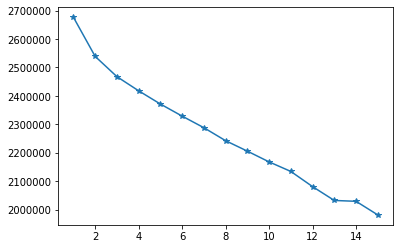

In [100]:
plt.plot(range(1,16),li,marker='*')

# No of clusters = 2

In [101]:
km1 = KMeans(2).fit(sc_x_df)

In [102]:
km1.labels_

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

In [103]:
centroids=km1.cluster_centers_

In [104]:
centroid_df = pd.DataFrame(centroids, columns = list(sc_x_df.columns) )

In [105]:
centroid_df

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee
0,0.013215,-0.661916,-0.660216,-0.444499,-0.190019,-0.177988,-0.475951,-0.111125,-0.049563,-0.028628,0.048904,0.088427,-0.473498,-0.204211,-0.436261,-0.062064,-0.018587,-0.013830,0.096115,-0.509342,-0.029036,0.116263,0.009393,-0.061975,-0.125725,-0.101501,-0.050907,-0.407283,-0.006469,0.006750,0.064536,0.375845,-0.044670,-0.159970,-0.010340,0.163517,-0.000508,-0.10077,0.00695,-0.033366,-0.008827,-0.000446,-0.015374,-0.071233,0.008026,0.048177,-0.025714,-0.085718,0.080558,-0.040043,0.044029,-0.016181,0.027222,-0.014194,-0.263028,-0.042319
1,-0.014394,0.720967,0.719115,0.484154,0.206971,0.193867,0.518412,0.121038,0.053985,0.031182,-0.053267,-0.096316,0.515740,0.222429,0.475181,0.067601,0.020245,0.015064,-0.104689,0.554781,0.031626,-0.126635,-0.010231,0.067504,0.136941,0.110556,0.055448,0.443618,0.007046,-0.007352,-0.070293,-0.409375,0.048655,0.174241,0.011263,-0.178104,0.000553,0.10976,-0.00757,0.036343,0.009614,0.000486,0.016745,0.077588,-0.008741,-0.052475,0.028008,0.093365,-0.087744,0.043615,-0.047957,0.017625,-0.029651,0.015461,0.286493,0.046094


In [106]:
#sc_df_test_df
km2 = KMeans(2).fit(sc_df_test_df)

In [107]:
km2.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [108]:
centroids1=km1.cluster_centers_

In [109]:
centroid_df1 = pd.DataFrame(centroids1, columns = list(sc_x_df.columns) )

In [110]:
centroid_df1

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee
0,0.013215,-0.661916,-0.660216,-0.444499,-0.190019,-0.177988,-0.475951,-0.111125,-0.049563,-0.028628,0.048904,0.088427,-0.473498,-0.204211,-0.436261,-0.062064,-0.018587,-0.013830,0.096115,-0.509342,-0.029036,0.116263,0.009393,-0.061975,-0.125725,-0.101501,-0.050907,-0.407283,-0.006469,0.006750,0.064536,0.375845,-0.044670,-0.159970,-0.010340,0.163517,-0.000508,-0.10077,0.00695,-0.033366,-0.008827,-0.000446,-0.015374,-0.071233,0.008026,0.048177,-0.025714,-0.085718,0.080558,-0.040043,0.044029,-0.016181,0.027222,-0.014194,-0.263028,-0.042319
1,-0.014394,0.720967,0.719115,0.484154,0.206971,0.193867,0.518412,0.121038,0.053985,0.031182,-0.053267,-0.096316,0.515740,0.222429,0.475181,0.067601,0.020245,0.015064,-0.104689,0.554781,0.031626,-0.126635,-0.010231,0.067504,0.136941,0.110556,0.055448,0.443618,0.007046,-0.007352,-0.070293,-0.409375,0.048655,0.174241,0.011263,-0.178104,0.000553,0.10976,-0.00757,0.036343,0.009614,0.000486,0.016745,0.077588,-0.008741,-0.052475,0.028008,0.093365,-0.087744,0.043615,-0.047957,0.017625,-0.029651,0.015461,0.286493,0.046094


In [111]:
x_train['Unsupervised_loan_status'] = km1.labels_

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
x_train

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee,Unsupervised_loan_status
20576,49791582,123.189497,140.394466,60,18.84,10.0,6.635173,5.856965,0,0,78.0,1,31.083668,24.018164,24.888066,0.00,35.0,0,-63.654529,34.903704,21300.000000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,7,0.0000,0
16428,11020139,132.937857,151.966120,60,17.10,3.0,6.591809,9.869392,0,2,79.0,0,43.433681,16.249245,35.123401,0.00,109.0,0,2.651615,45.810131,44400.000000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0.0000,1
59793,813884,112.208581,127.058846,36,9.99,6.0,6.629515,4.967119,0,2,38.0,0,38.639845,23.820026,19.843280,11.35,48.0,0,2.646856,53.010795,40.011723,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4.3000,0
63272,980289,122.326991,139.269715,60,12.99,6.0,6.653643,11.805186,0,2,30.0,0,51.518476,36.397547,34.688292,0.00,235.0,0,2.490379,79.380311,65.975820,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17,0.0000,1
25902,63434974,162.166661,186.728966,36,11.53,6.0,6.989169,8.924302,0,0,30.0,0,58.505199,48.241784,21.839484,0.00,17.0,0,-63.654529,58.342518,7500.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0.0000,1
14494,64963538,103.952911,117.676325,36,10.99,5.0,6.716015,7.886900,0,1,30.0,1,16.015320,8.111117,13.057357,0.00,13.0,0,-63.654529,40.560721,33800.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,4,0.0000,0
55055,59660626,154.961280,178.237660,36,6.24,5.0,6.890697,9.154434,0,0,30.0,0,46.790731,7.580638,17.766093,0.00,22.0,0,-63.654529,80.815305,45600.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,12,0.0000,1
12427,53915007,149.880877,172.006832,60,18.25,10.0,6.766309,7.038766,3,0,18.0,0,37.429956,24.940076,27.323206,0.00,31.0,0,-63.654529,80.240451,10500.000000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8,0.0000,1
54824,2027235,120.132265,136.773248,36,13.11,10.0,6.466822,12.114933,0,0,66.0,0,39.866154,44.544181,29.291715,0.00,156.0,0,-63.654529,40.189893,38650.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0.0000,0
37282,70238014,80.830030,90.606187,36,11.49,10.0,6.578699,8.979712,3,0,10.0,0,23.568789,5.883203,6.971162,0.00,4.0,0,-63.654529,40.501932,74400.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,12,0.0000,0


In [113]:
x_test['Unsupervised_loan_status'] = km2.labels_

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
y_train

20576    0
16428    0
59793    0
63272    0
25902    0
14494    0
55055    0
12427    0
54824    1
37282    0
49105    0
29051    1
34313    1
46608    0
50970    0
28902    0
55743    1
17281    1
2065     0
31910    0
62273    1
25773    0
47527    0
48040    0
62104    1
10236    0
44497    0
2468     0
44318    0
5129     0
        ..
49714    0
22926    0
57245    0
37532    0
19946    0
8444     0
51668    1
35730    0
45413    0
21758    1
54548    0
58546    0
32025    0
36230    0
31228    1
43757    0
7751     0
49100    0
20609    1
32912    0
21440    0
52047    1
7813     0
43723    0
50057    0
32511    0
5192     0
12172    0
33003    1
62501    1
Name: loan_status, Length: 47797, dtype: int64

In [115]:
x_train['Unsupervised_loan_status']

20576    0
16428    1
59793    0
63272    1
25902    1
14494    0
55055    1
12427    1
54824    0
37282    0
49105    1
29051    1
34313    1
46608    0
50970    1
28902    0
55743    0
17281    1
2065     0
31910    0
62273    0
25773    1
47527    0
48040    1
62104    1
10236    1
44497    0
2468     1
44318    1
5129     0
        ..
49714    0
22926    0
57245    0
37532    0
19946    1
8444     1
51668    0
35730    0
45413    1
21758    1
54548    1
58546    0
32025    0
36230    0
31228    0
43757    1
7751     1
49100    1
20609    0
32912    1
21440    0
52047    0
7813     1
43723    0
50057    1
32511    0
5192     1
12172    0
33003    1
62501    1
Name: Unsupervised_loan_status, Length: 47797, dtype: int32

In [118]:
lia=[]
lib=[]

for i,j in zip(y_train,x_train['Unsupervised_loan_status']):
    if(i==j):
        lia.append(1)
        
    else:
        
        lib.append(1)
        


In [119]:
sum(lia)

23130

In [120]:
sum(lib)

24667

In [121]:
(23116/(23116+24681))

0.4836286796242442

In [122]:
23116+24681

47797

In [123]:
x_train

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,revol_bal,revol_util,total_rec_int,recoveries,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician,inactive_accounts,total_fee,Unsupervised_loan_status
20576,49791582,123.189497,140.394466,60,18.84,10.0,6.635173,5.856965,0,0,78.0,1,31.083668,24.018164,24.888066,0.00,35.0,0,-63.654529,34.903704,21300.000000,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,7,0.0000,0
16428,11020139,132.937857,151.966120,60,17.10,3.0,6.591809,9.869392,0,2,79.0,0,43.433681,16.249245,35.123401,0.00,109.0,0,2.651615,45.810131,44400.000000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0.0000,1
59793,813884,112.208581,127.058846,36,9.99,6.0,6.629515,4.967119,0,2,38.0,0,38.639845,23.820026,19.843280,11.35,48.0,0,2.646856,53.010795,40.011723,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4.3000,0
63272,980289,122.326991,139.269715,60,12.99,6.0,6.653643,11.805186,0,2,30.0,0,51.518476,36.397547,34.688292,0.00,235.0,0,2.490379,79.380311,65.975820,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17,0.0000,1
25902,63434974,162.166661,186.728966,36,11.53,6.0,6.989169,8.924302,0,0,30.0,0,58.505199,48.241784,21.839484,0.00,17.0,0,-63.654529,58.342518,7500.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0.0000,1
14494,64963538,103.952911,117.676325,36,10.99,5.0,6.716015,7.886900,0,1,30.0,1,16.015320,8.111117,13.057357,0.00,13.0,0,-63.654529,40.560721,33800.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,4,0.0000,0
55055,59660626,154.961280,178.237660,36,6.24,5.0,6.890697,9.154434,0,0,30.0,0,46.790731,7.580638,17.766093,0.00,22.0,0,-63.654529,80.815305,45600.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,12,0.0000,1
12427,53915007,149.880877,172.006832,60,18.25,10.0,6.766309,7.038766,3,0,18.0,0,37.429956,24.940076,27.323206,0.00,31.0,0,-63.654529,80.240451,10500.000000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8,0.0000,1
54824,2027235,120.132265,136.773248,36,13.11,10.0,6.466822,12.114933,0,0,66.0,0,39.866154,44.544181,29.291715,0.00,156.0,0,-63.654529,40.189893,38650.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0.0000,0
37282,70238014,80.830030,90.606187,36,11.49,10.0,6.578699,8.979712,3,0,10.0,0,23.568789,5.883203,6.971162,0.00,4.0,0,-63.654529,40.501932,74400.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,12,0.0000,0


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier().fit(x_train,y_train)

In [128]:
y_train_rfcpred = rf3.predict(x_train)

In [129]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [130]:
accuracy_score(y_train,y_train_rfcpred)

0.8614557398999937

In [131]:
print(classification_report(y_train,y_train_rfcpred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     36479
           1       0.91      0.46      0.61     11318

    accuracy                           0.86     47797
   macro avg       0.88      0.72      0.76     47797
weighted avg       0.87      0.86      0.84     47797



In [133]:
y_test_predrfc = rf3.predict(x_test)

In [134]:
accuracy_score(y_test,y_test_predrfc)

0.8573401117178183

In [135]:
print(classification_report(y_test,y_test_predrfc))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12098
           1       0.90      0.46      0.61      3835

    accuracy                           0.86     15933
   macro avg       0.88      0.72      0.76     15933
weighted avg       0.86      0.86      0.84     15933



In [136]:
print(confusion_matrix(y_test,y_test_predrfc))

[[11904   194]
 [ 2079  1756]]


In [137]:
y_trl_pred = lr3.predict(x_train)

In [138]:
accuracy_score(y_train,y_trl_pred)

0.8830470531623323

In [139]:
print(classification_report(y_train,y_trl_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     36479
           1       0.82      0.65      0.72     11318

    accuracy                           0.88     47797
   macro avg       0.86      0.80      0.82     47797
weighted avg       0.88      0.88      0.88     47797



In [140]:
y_tel_pred = lr3.predict(x_test)

In [142]:
accuracy_score(y_test,y_tel_pred)

0.8809389317768154

In [143]:
print(classification_report(y_test,y_tel_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12098
           1       0.82      0.65      0.73      3835

    accuracy                           0.88     15933
   macro avg       0.86      0.80      0.82     15933
weighted avg       0.88      0.88      0.88     15933



In [156]:
# pca

In [66]:
lr4 = LogisticRegression().fit(x_train,y_train)
rf4= RandomForestClassifier().fit(x_train,y_train)

In [68]:
yp_tr_pred = lr4.predict(x_train)

In [69]:
accuracy_score(y_train,yp_tr_pred)

0.765675670021131

In [70]:
print(classification_report(y_train,yp_tr_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     36479
           1       0.66      0.02      0.04     11318

    accuracy                           0.77     47797
   macro avg       0.71      0.51      0.45     47797
weighted avg       0.74      0.77      0.67     47797



In [57]:
yp_te_pred = lr4.predict(x_pca_test)

In [58]:
accuracy_score(y_test,yp_te_pred)

1.0

In [59]:
print(classification_report(y_test,yp_te_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12098
           1       1.00      1.00      1.00      3835

    accuracy                           1.00     15933
   macro avg       1.00      1.00      1.00     15933
weighted avg       1.00      1.00      1.00     15933



In [60]:
yp_tr_pred = rf4.predict(x_pca_train)

In [61]:
accuracy_score(y_train,yp_tr_pred)

1.0

In [62]:
print(classification_report(y_train,yp_tr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36479
           1       1.00      1.00      1.00     11318

    accuracy                           1.00     47797
   macro avg       1.00      1.00      1.00     47797
weighted avg       1.00      1.00      1.00     47797



In [63]:
yp_te_pred = rf4.predict(x_pca_test)

In [64]:
accuracy_score(y_test,yp_te_pred)

0.9978660641436014

In [65]:
print(classification_report(y_test,yp_te_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12098
           1       1.00      0.99      1.00      3835

    accuracy                           1.00     15933
   macro avg       1.00      1.00      1.00     15933
weighted avg       1.00      1.00      1.00     15933

